# External modules

In [34]:
library(tidyverse)
library("DataExplorer")
library(DescTools)
library(Hmisc)
library("scatterplot3d")
library(plotly)

In [35]:
options(repr.plot.width=19, repr.plot.height=12)

# Internal modules

In [36]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))

# Data

In [37]:
source <- "./06_experimentation_1/final_dataset.csv"

In [38]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [39]:
str(data)

'data.frame':	22846 obs. of  59 variables:
 $ timestamp             : int  17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 17608320 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num  -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude    : num  9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity              : num  5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ lateral_error         : num  -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error    : num  0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ haversine_error       : num  0.576 0.572 0.569 0.6 0.579 ...
 $ latitude_error        : num  4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error       : num  1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ heading_error         : num  1.95 1.97 2.15 2.08 2.13 ...
 $ lateral_error_abs     : num  0.

# Outlier detection

In [40]:
coefficient_iqr <- 3
method <- c("interpolate", "mode", "median", "mean")[1]

## lateral_error_abs

In [41]:
data_lateral_error_abs_object <- impute_outliers(x = data$lateral_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [42]:
print(names(data_lateral_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [43]:
print(data_lateral_error_abs_object$outlier_positions)

  [1]  2342  2343  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353
 [13]  2354  2355  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365
 [25]  2366  2367  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377
 [37]  2378  2379  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389
 [49]  2390  2391  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401
 [61]  2402  2403  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413
 [73]  2414  2415  2416  2417  4810  4811  4812  4813  4814  4815  4816  4817
 [85]  4818  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829
 [97]  4830  4831  4832  4833 13506 16571 16572 16573 16574 16575 16576 16577
[109] 16578 16579 16598 16599 16600 16601 16602 16603 16604 16605 16606 16607
[121] 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619
[133] 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631
[145] 16632 16633 16634 16635 16636 16637 16638 16639 16640 1664

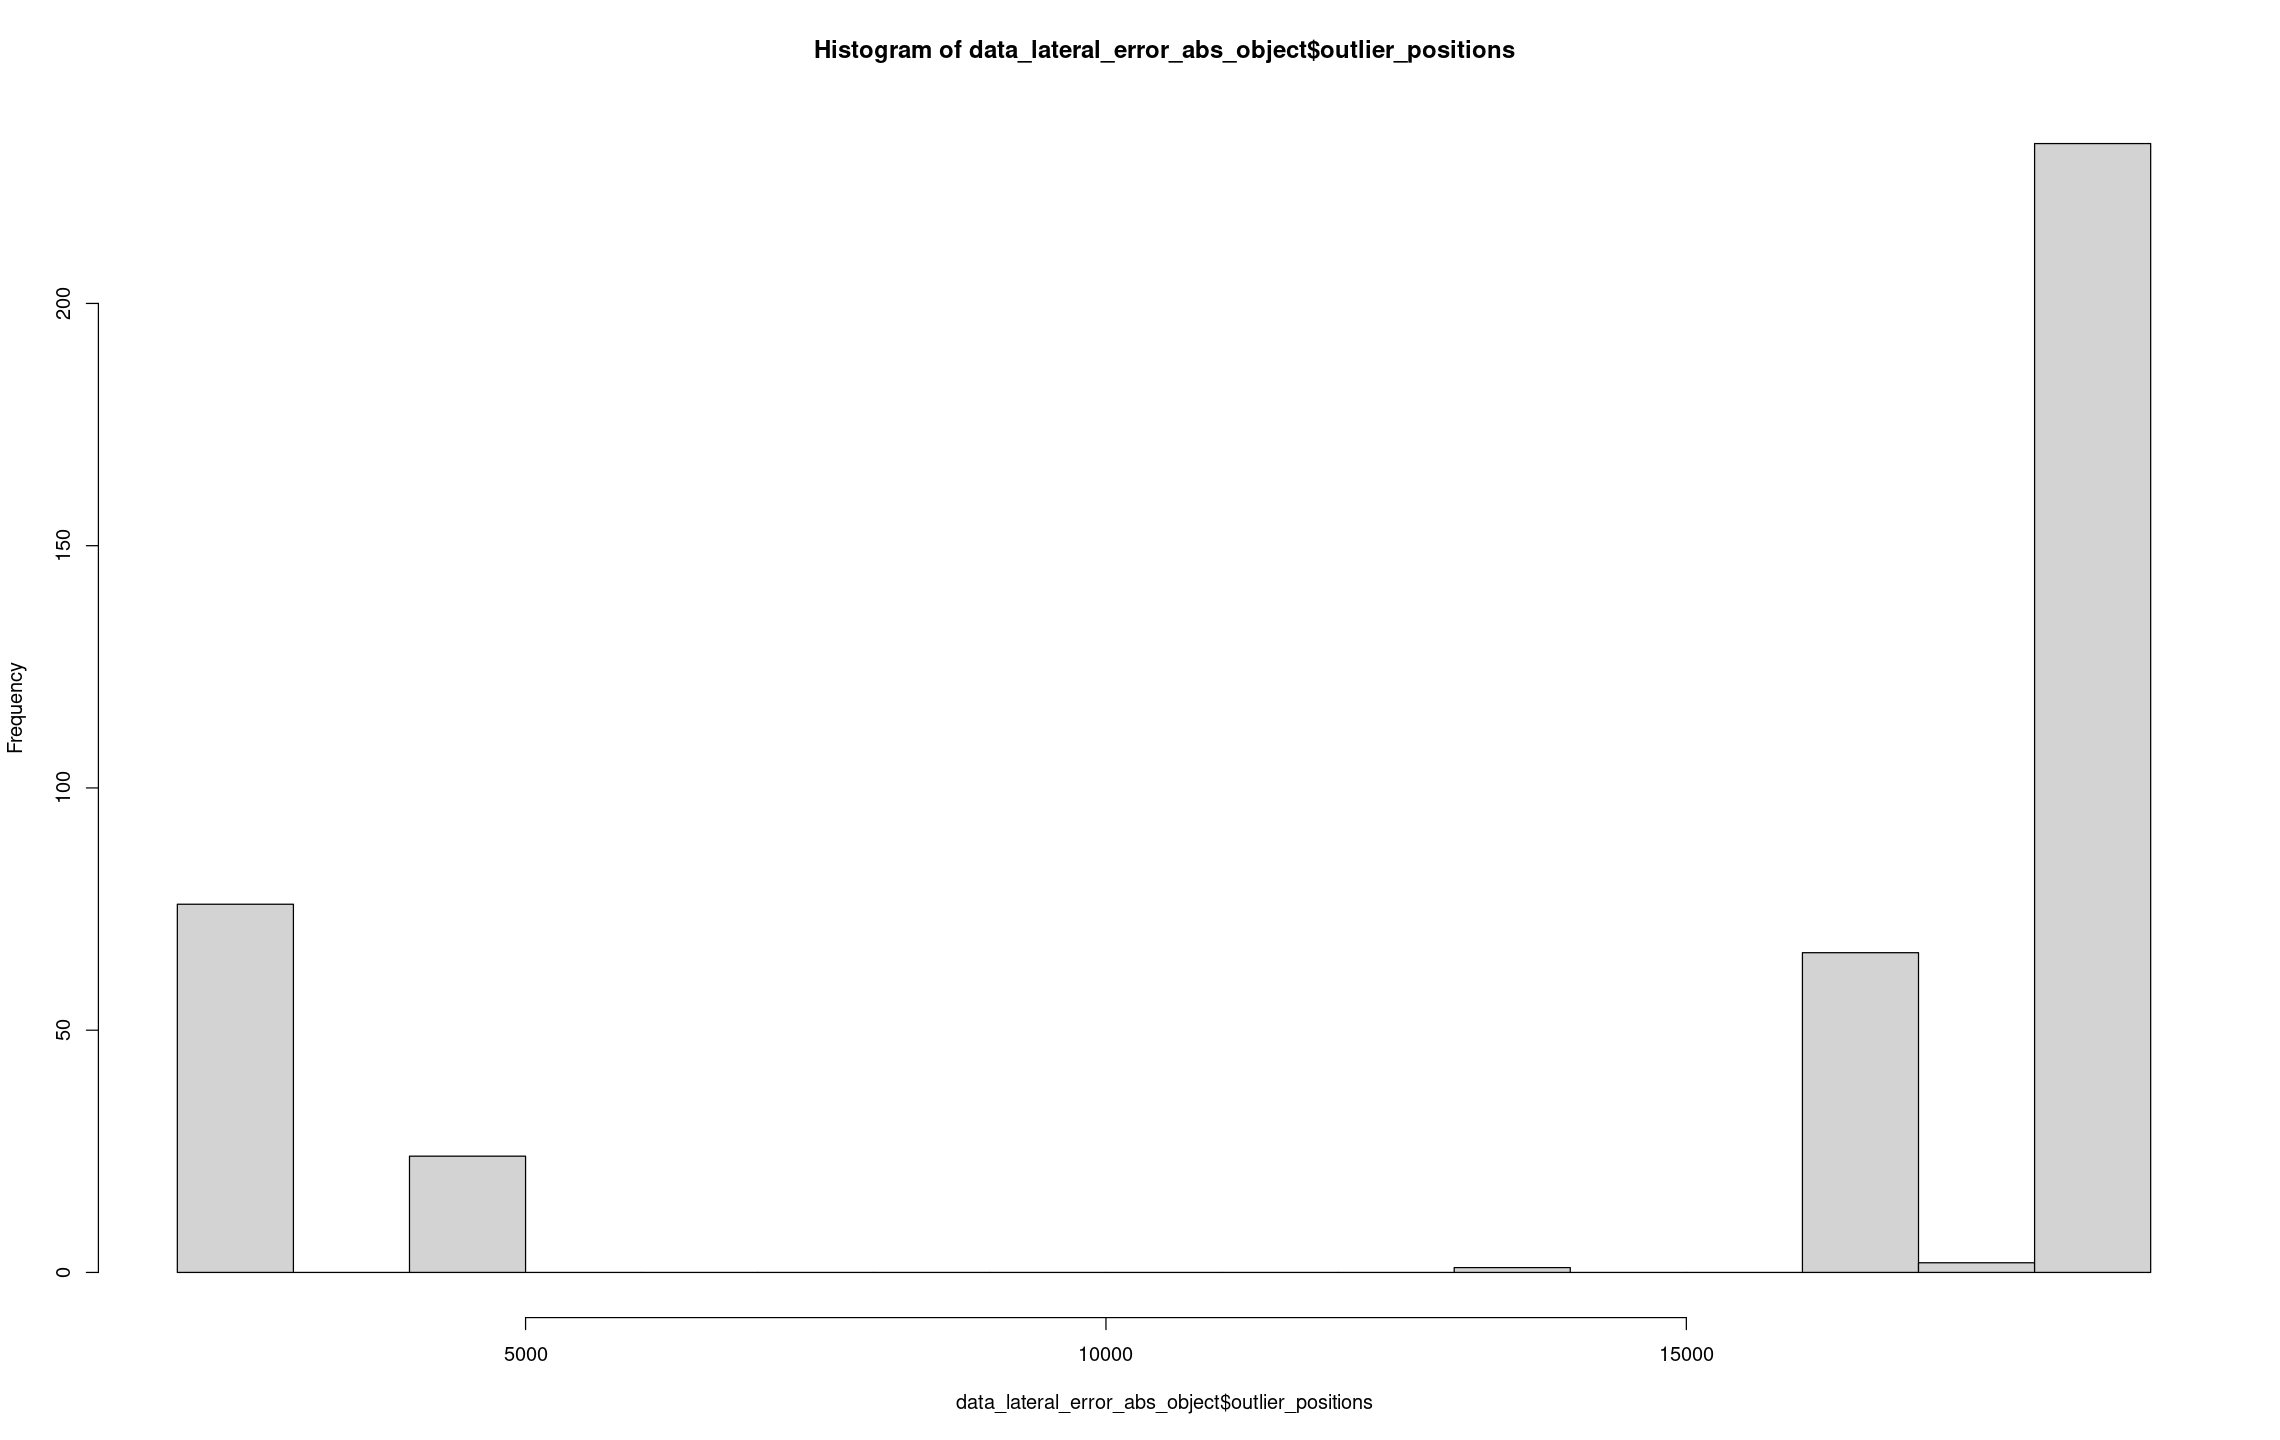

In [44]:
hist(data_lateral_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_lateral_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'846        22'846             0        22'580             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0481903097  0.0872314461  0.1457093060  0.3253337592  0.6304634511
                                                                      
         range            sd         vcoef           mad           IQR
  2.0623233317  0.3861897127  0.8710025034  0.3090764262  0.4847541451
                                                                      
          mean        meanCI
  0.4433853074  0.4383772797
                0.4483933350
                            
           .90           .95
  0.943007

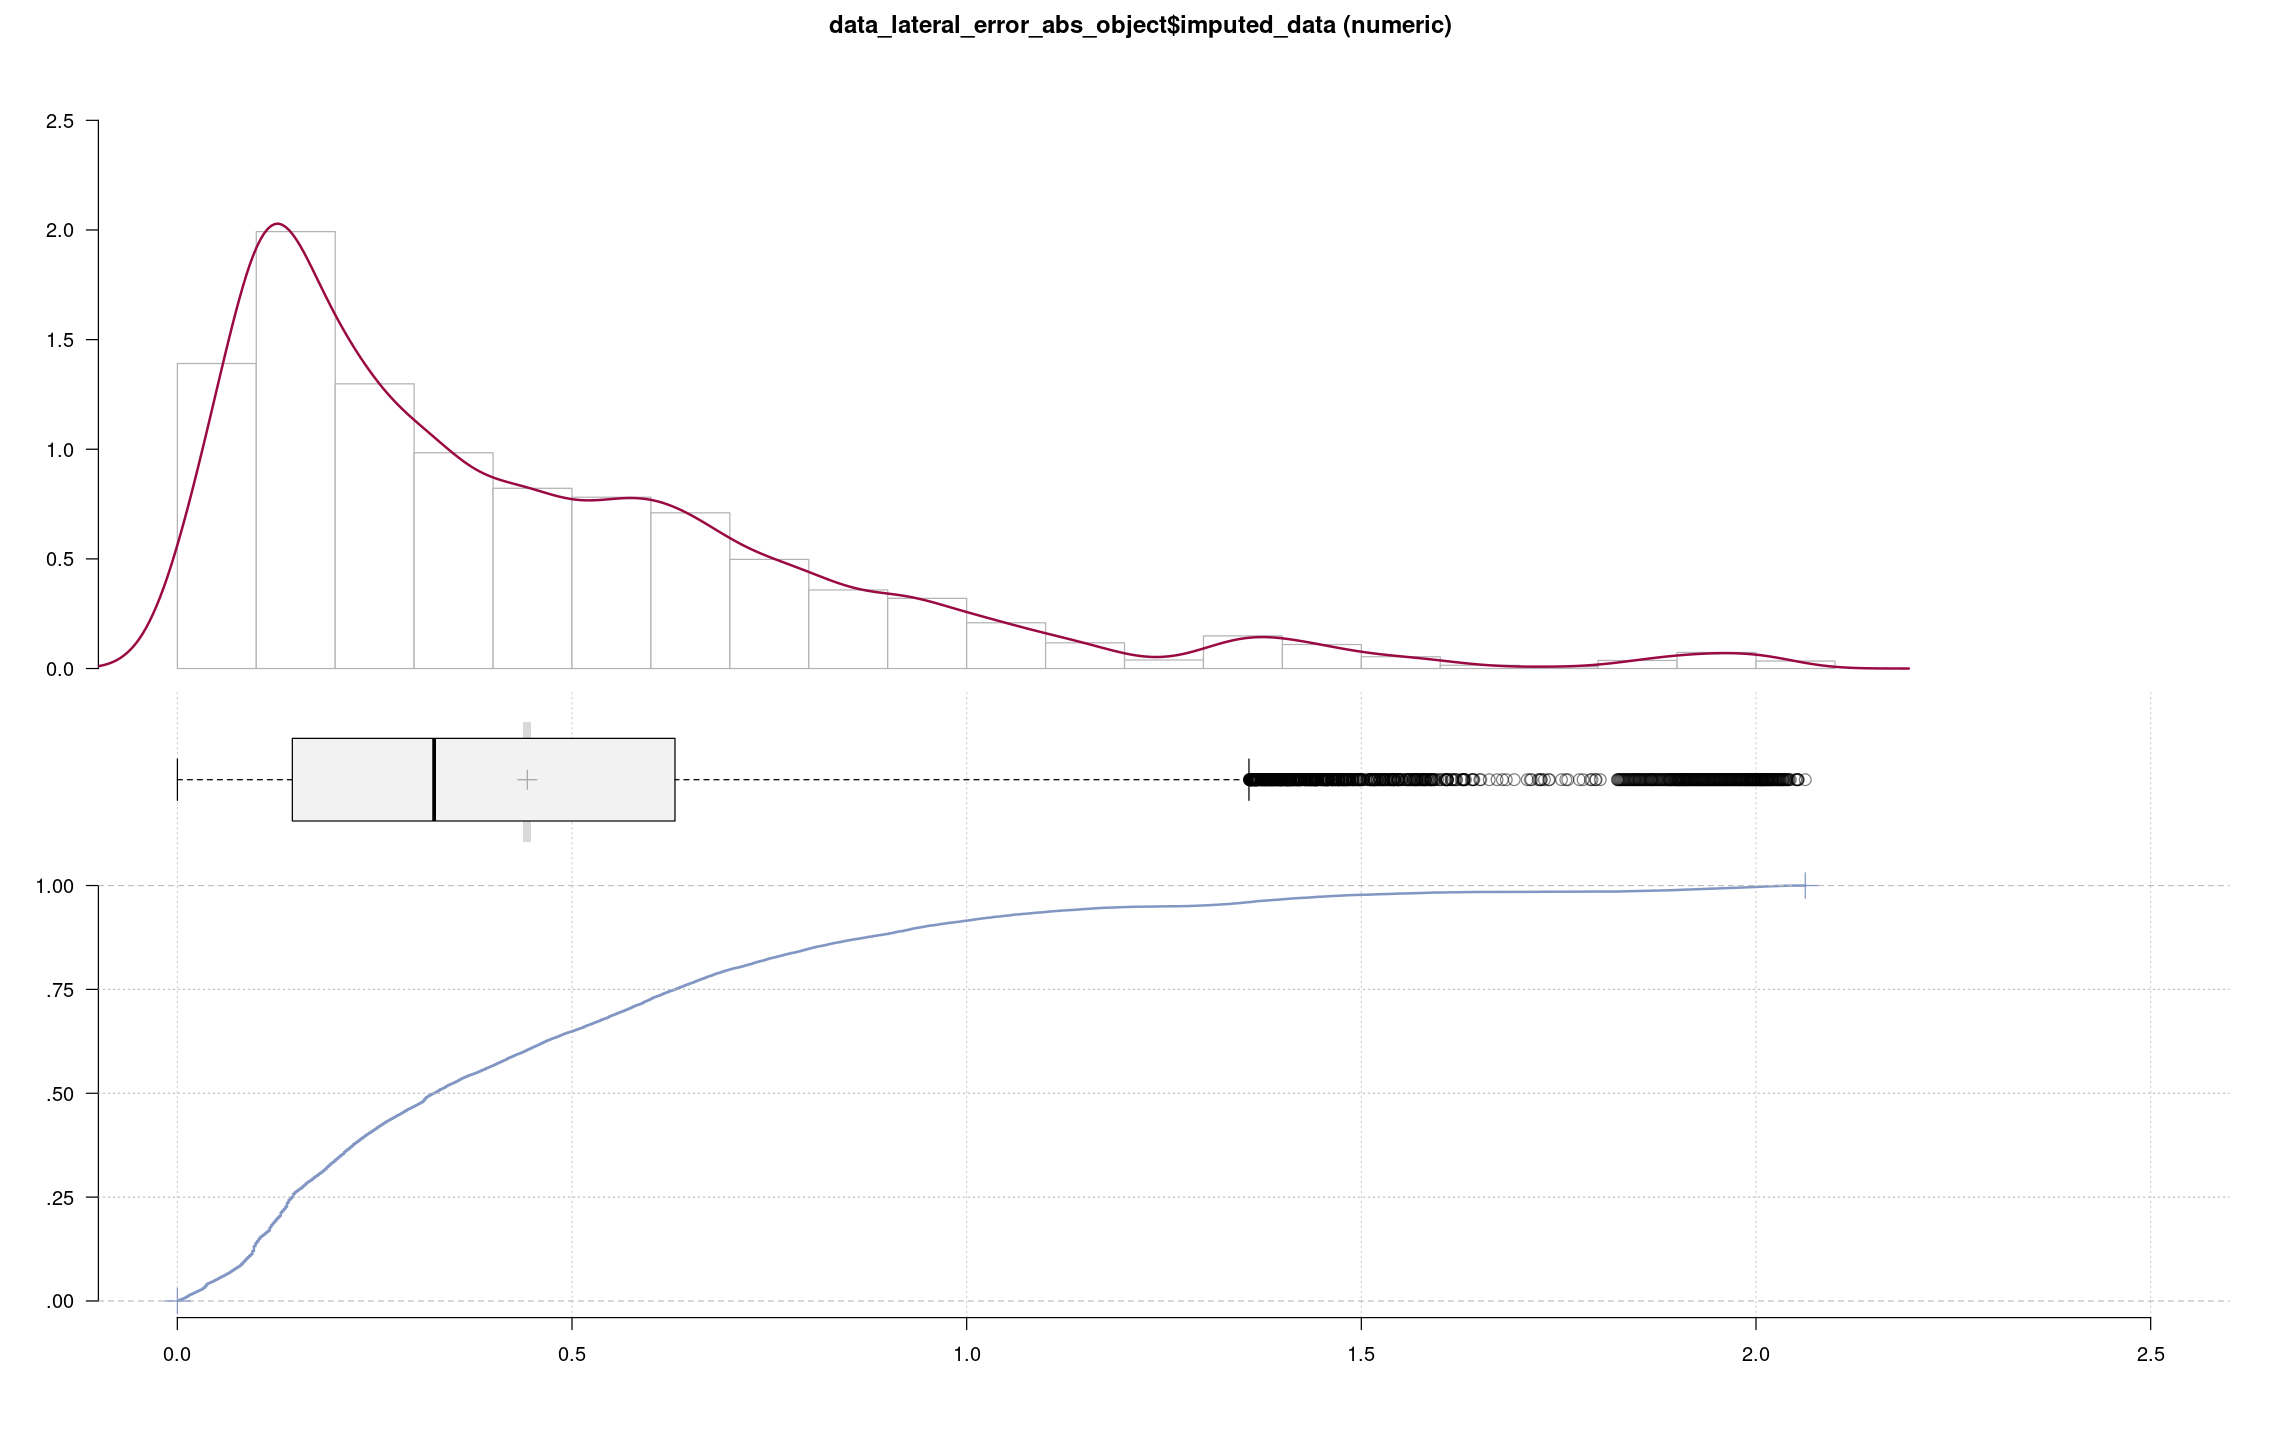

In [45]:
Desc(data_lateral_error_abs_object$imputed_data)

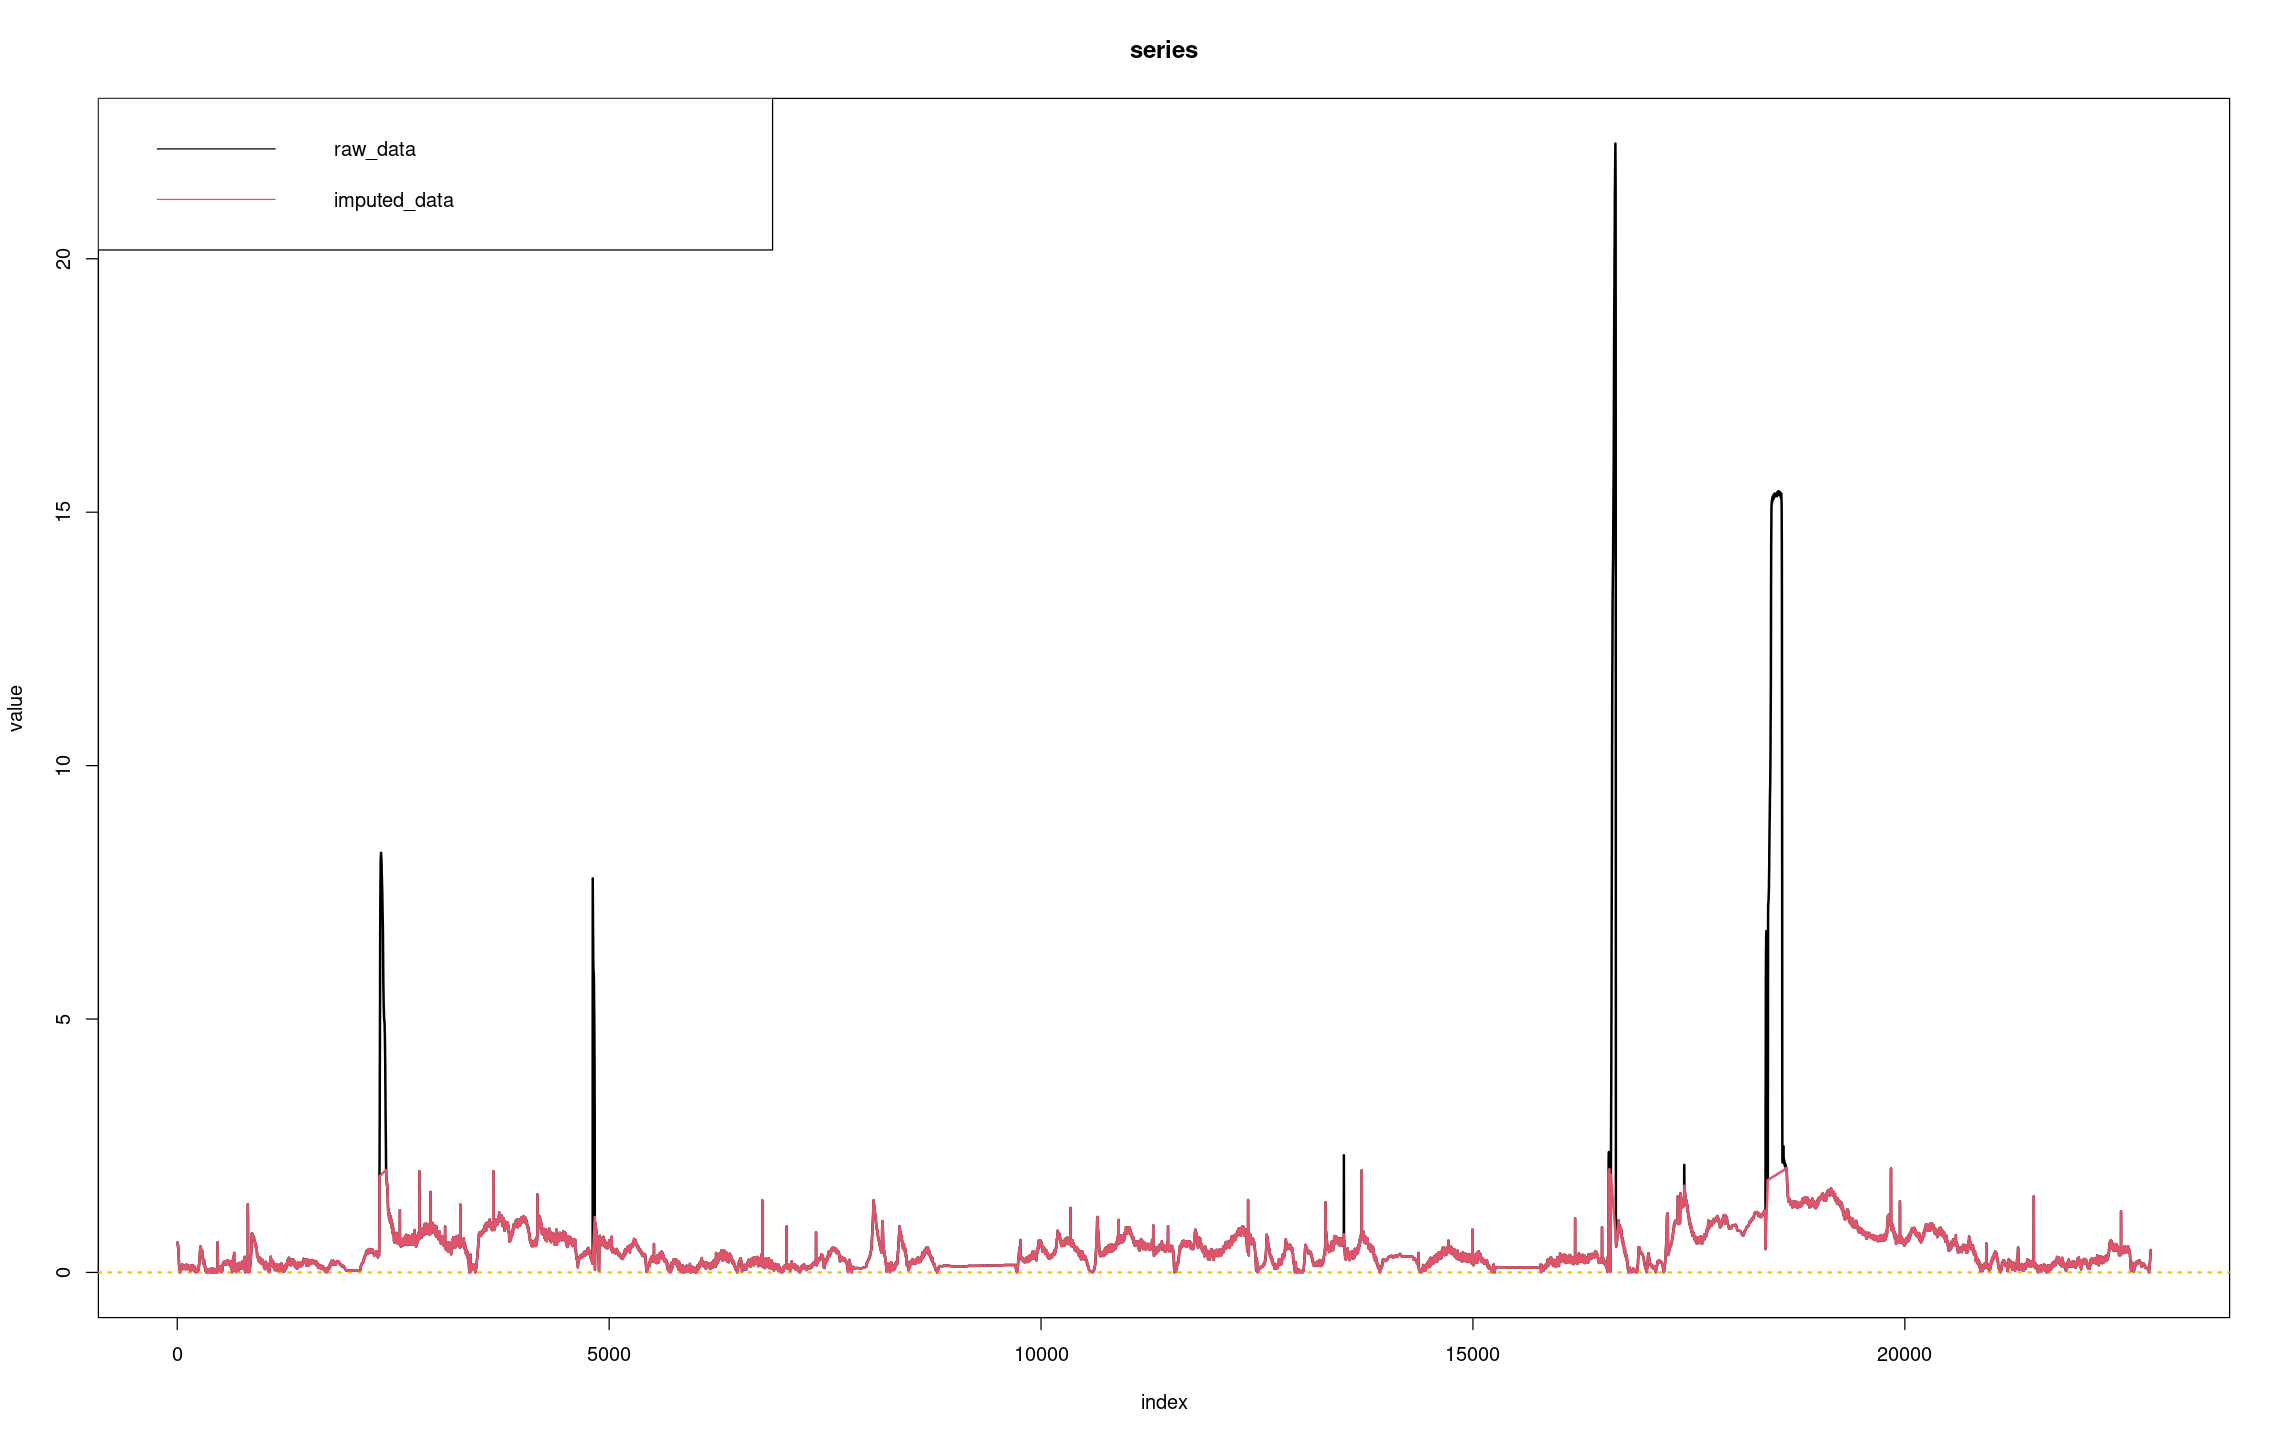

In [46]:
plot(data_lateral_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_lateral_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

## longitudinal_error_abs

In [47]:
data_longitudinal_error_abs_object <- impute_outliers(x = data$longitudinal_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = method)

In [48]:
print(names(data_longitudinal_error_abs_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [49]:
print(data_longitudinal_error_abs_object$outlier_positions)

  [1]  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359  2360
 [13]  2361  2362  2363  4810  4811  4812  4813  4814  4815  4816  4817  4818
 [25]  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830
 [37]  4831  4832  4833  4834  4835  4836  4837  4838  4839  4840  4841  4842
 [49]  4843  4844  4845  4846  4847  4848  4849  4850  4851  4852  4853  4854
 [61]  4855  4856  4857 16561 16562 16563 16564 16565 16566 16567 16586 16587
 [73] 16588 16589 16590 16591 16592 16607 16608 16609 16610 16611 16612 16613
 [85] 16614 16615 16616 16617 16618 16619 16620 16621 16622 16623 16624 16625
 [97] 16626 16627 16628 16629 16630 16631 16632 16633 16634 16635 16636 16637
[109] 16638 16639 16640 16641 16642 16643 16644 16645 16646 16647 16648 16649
[121] 16650 16651 16652 16653 16654 18387 18388 18389 18390 18391 18392 18393
[133] 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405
[145] 18406 18407 18408 18409 18410 18411 18412 18413 18414 1841

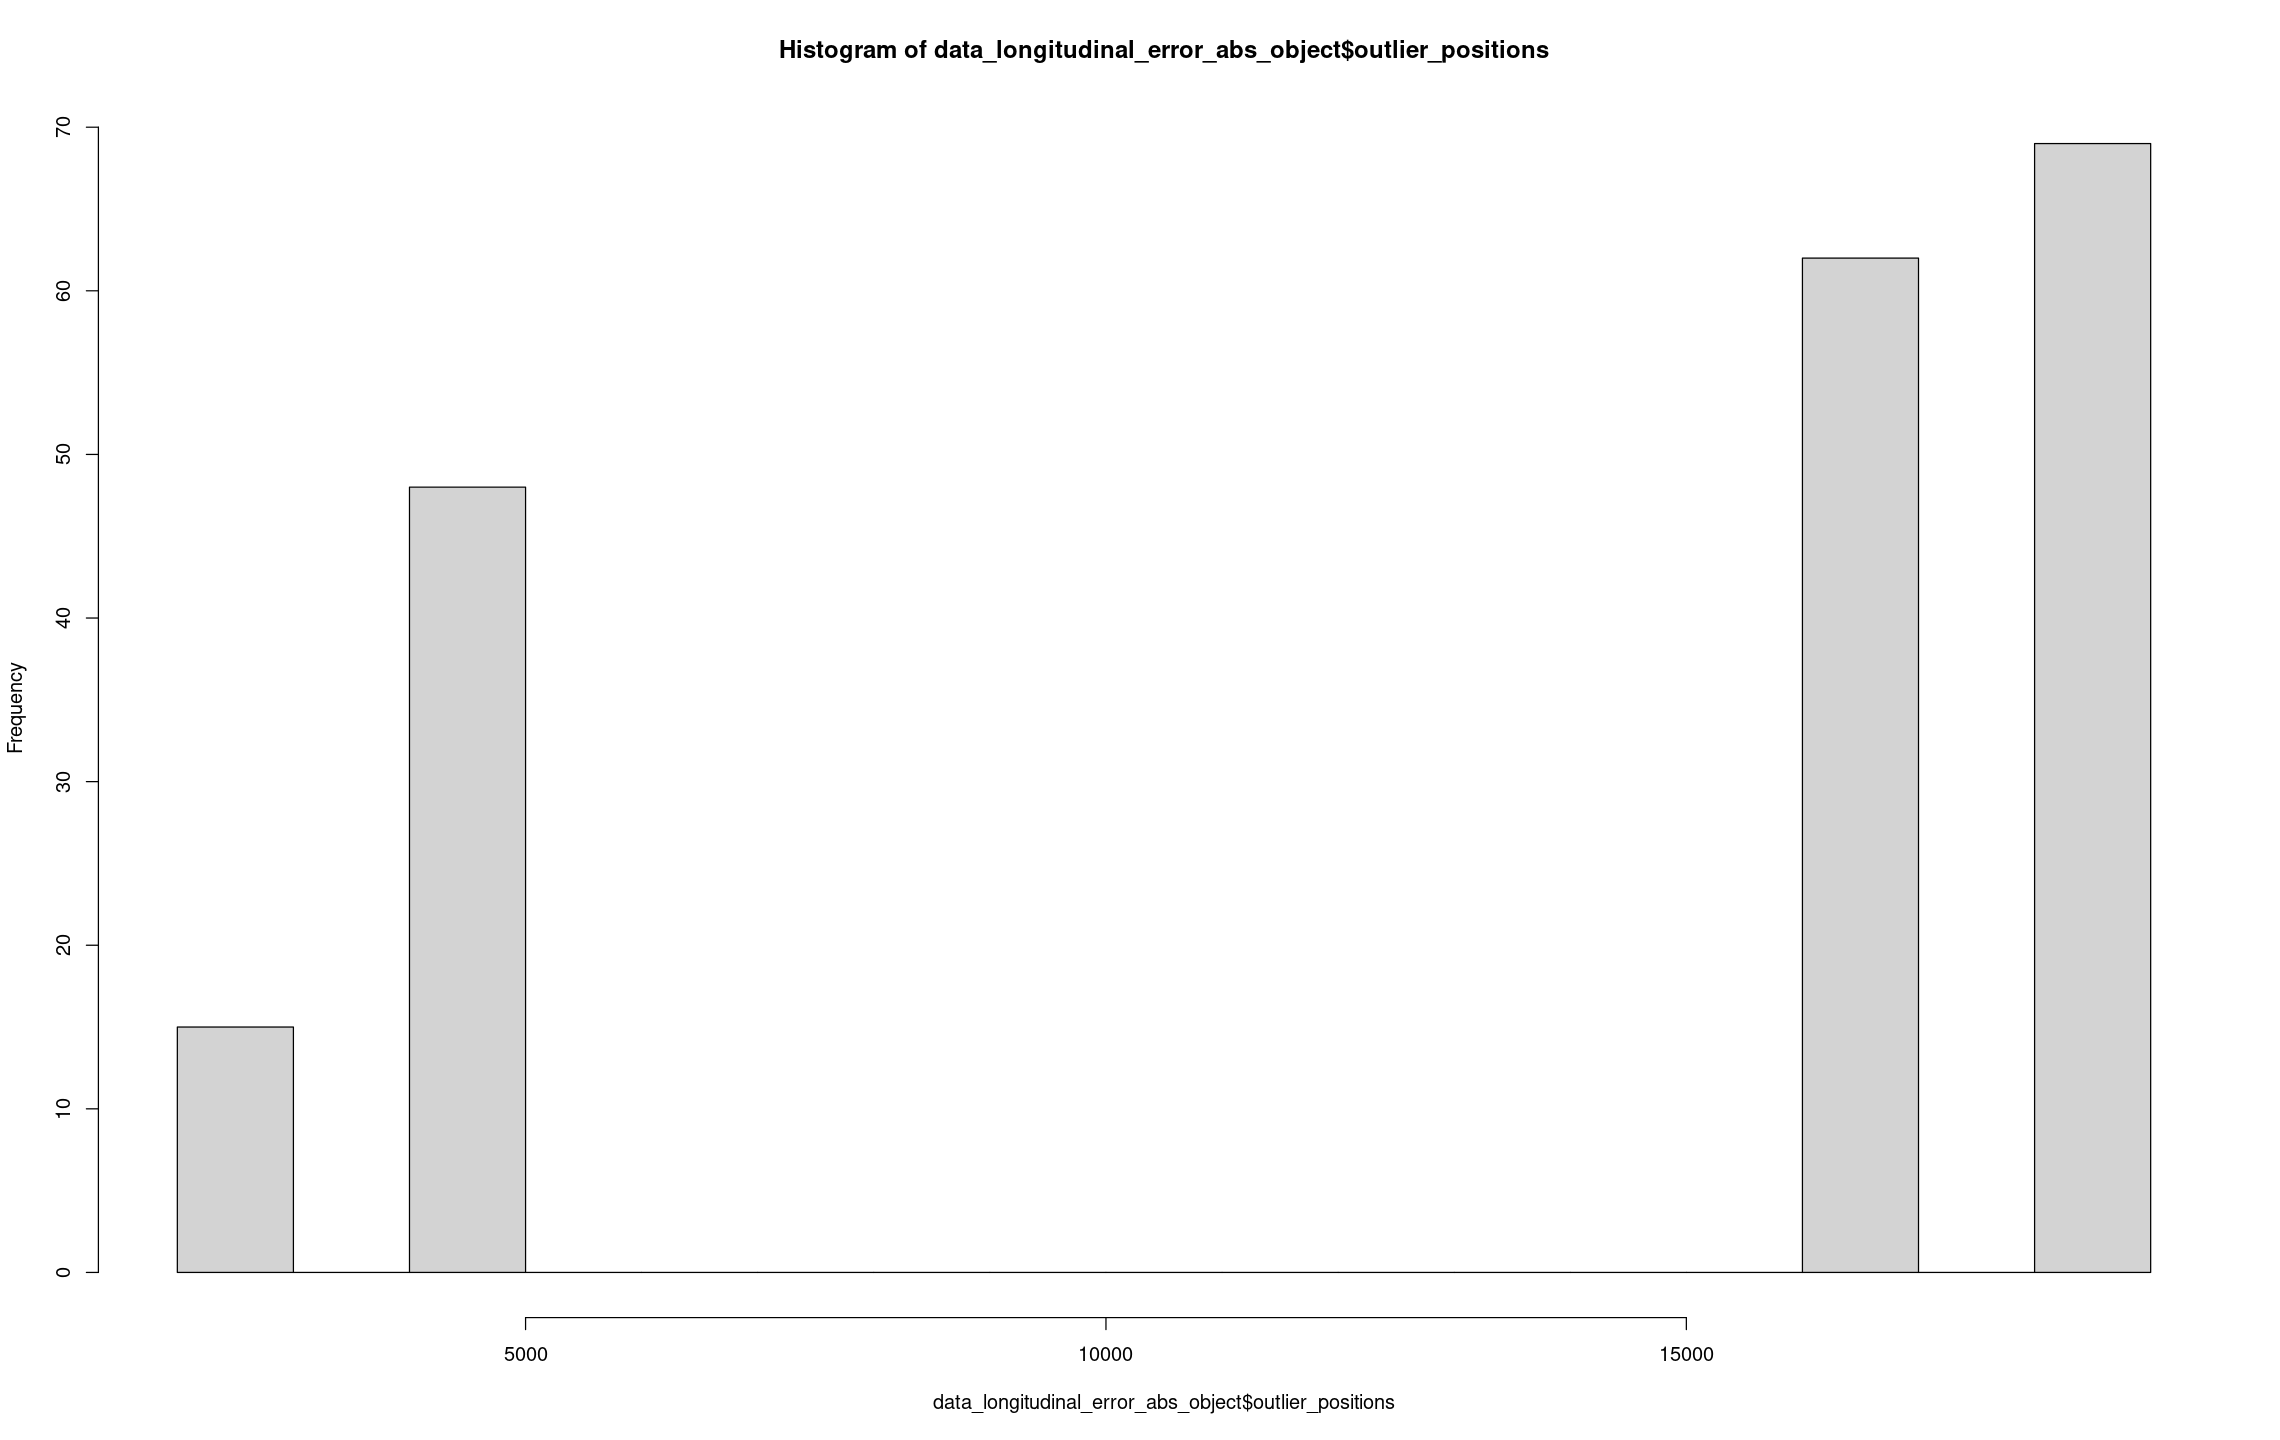

In [50]:
hist(data_longitudinal_error_abs_object$outlier_positions, nclass = 20)

------------------------------------------------------------------------------ 
data_longitudinal_error_abs_object$imputed_data (numeric)

        length             n           NAs        unique            0s'
        22'846        22'846             0        22'576             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.0074603134  0.0154924053  0.0475801267  0.1227869280  0.2788421661
                                                                      
         range            sd         vcoef           mad           IQR
  0.9709456442  0.1857992775  0.9840513933  0.1407327554  0.2312620394
                                                                      
          mean        meanCI
  0.1888105425  0.1864011363
                0.1912199488
                            
           .90           .95
  0.4

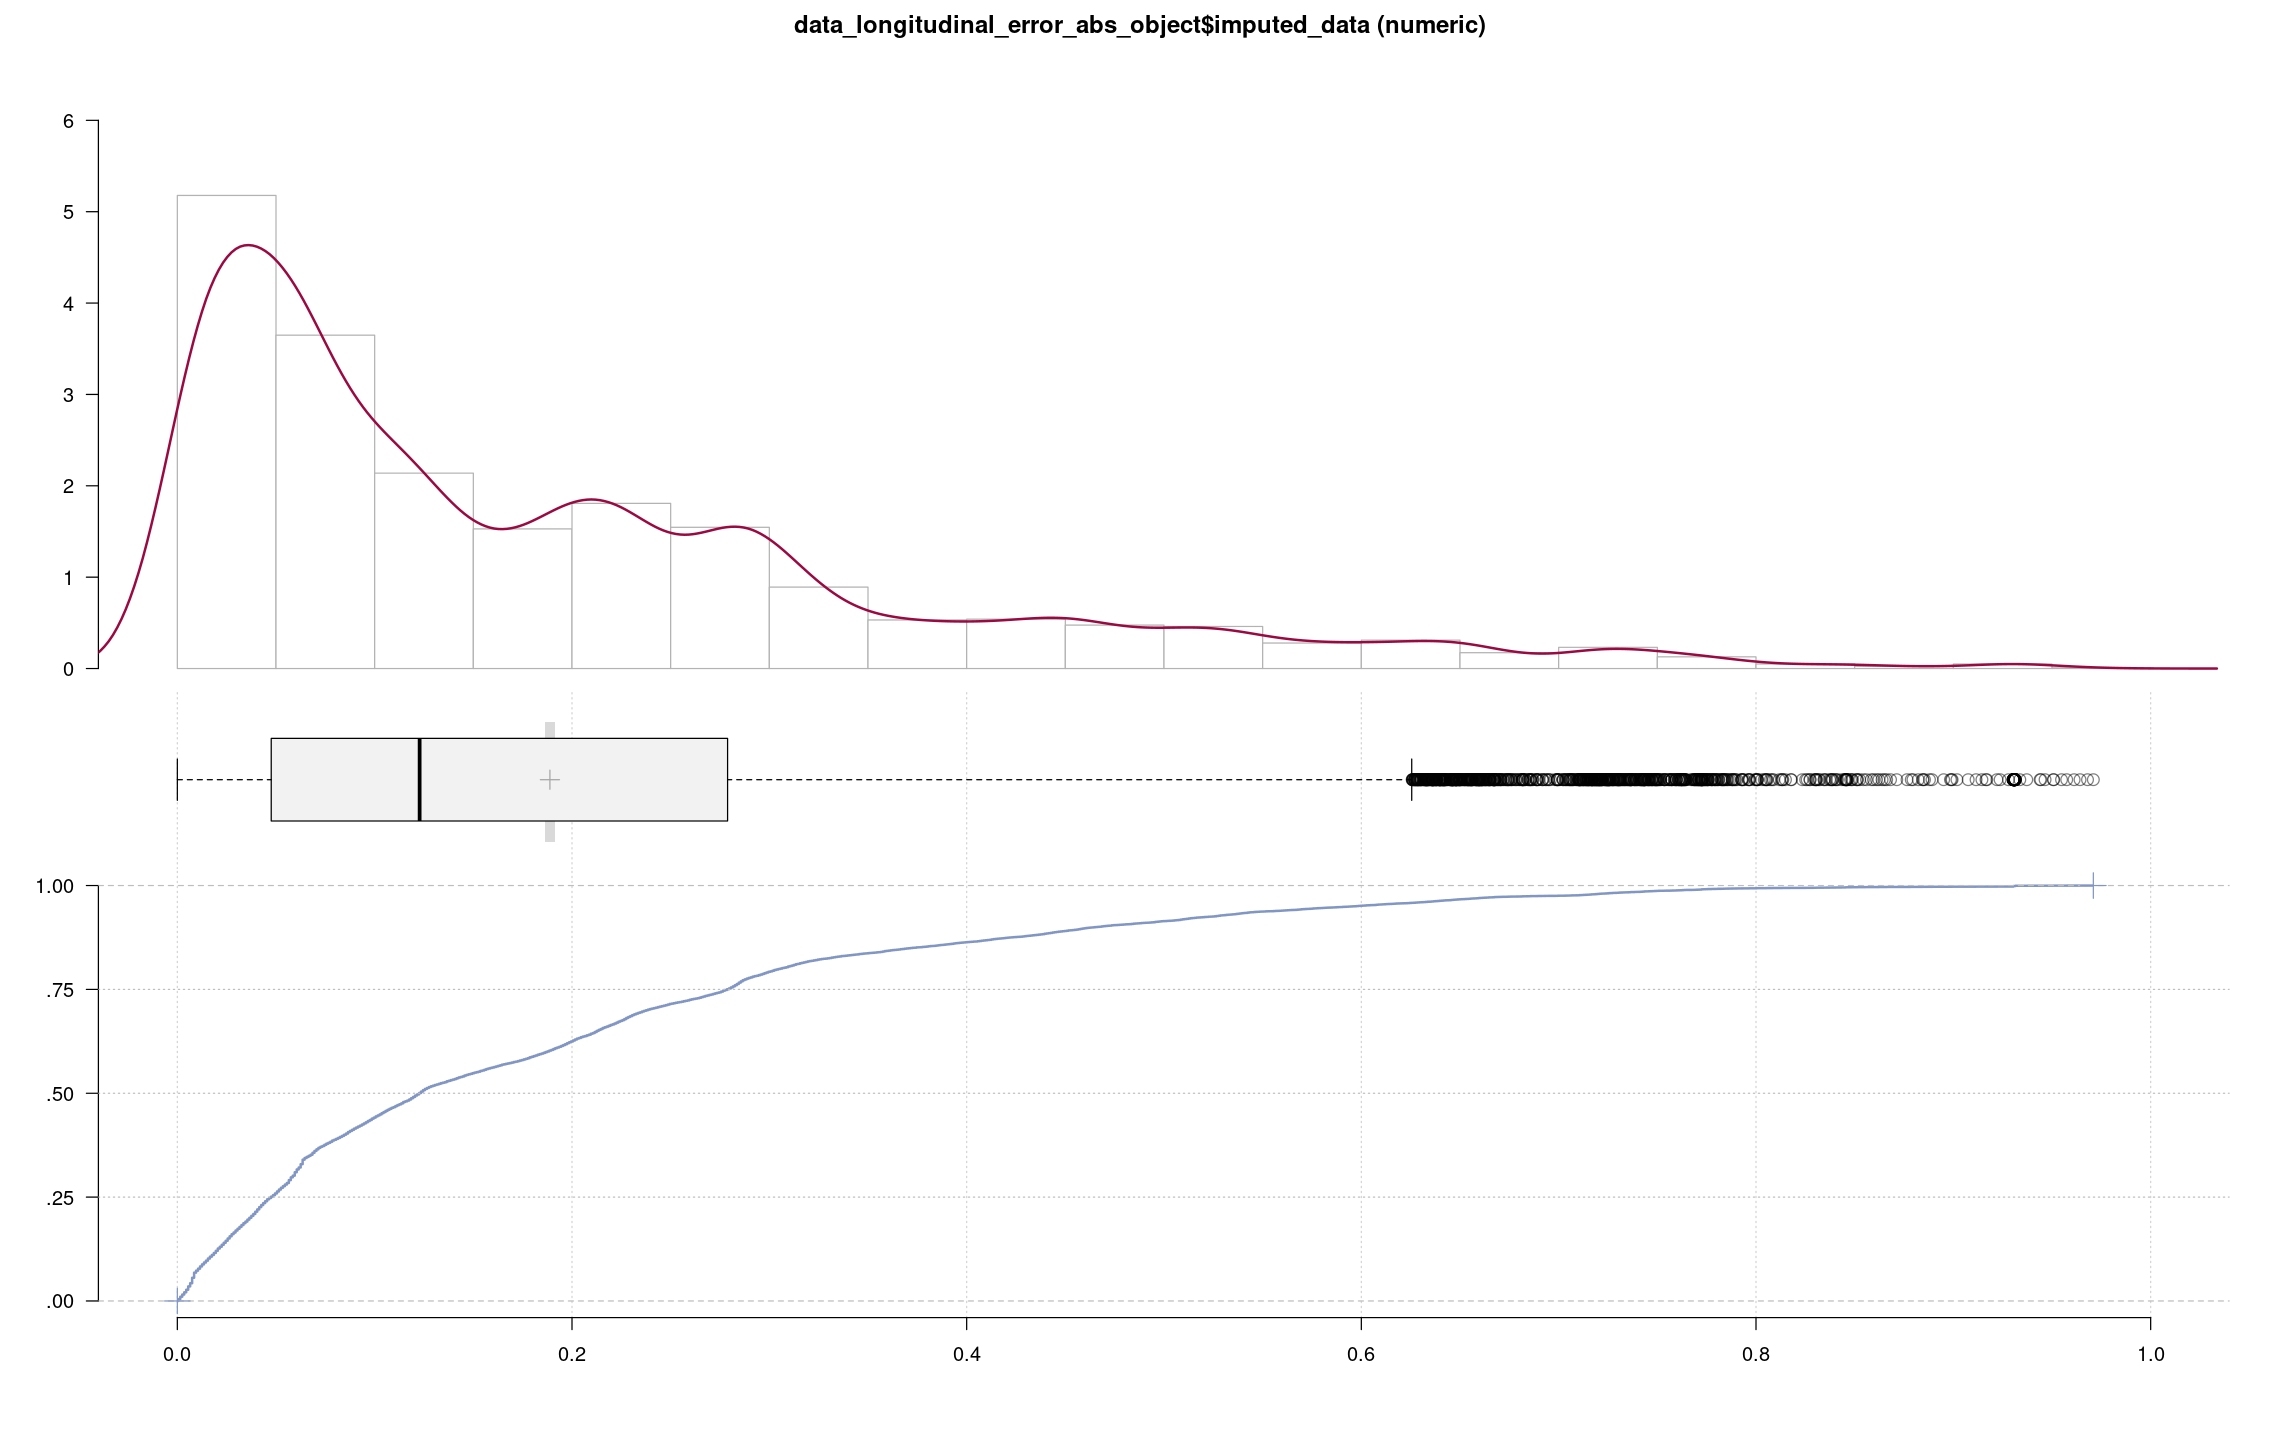

In [51]:
Desc(data_longitudinal_error_abs_object$imputed_data)

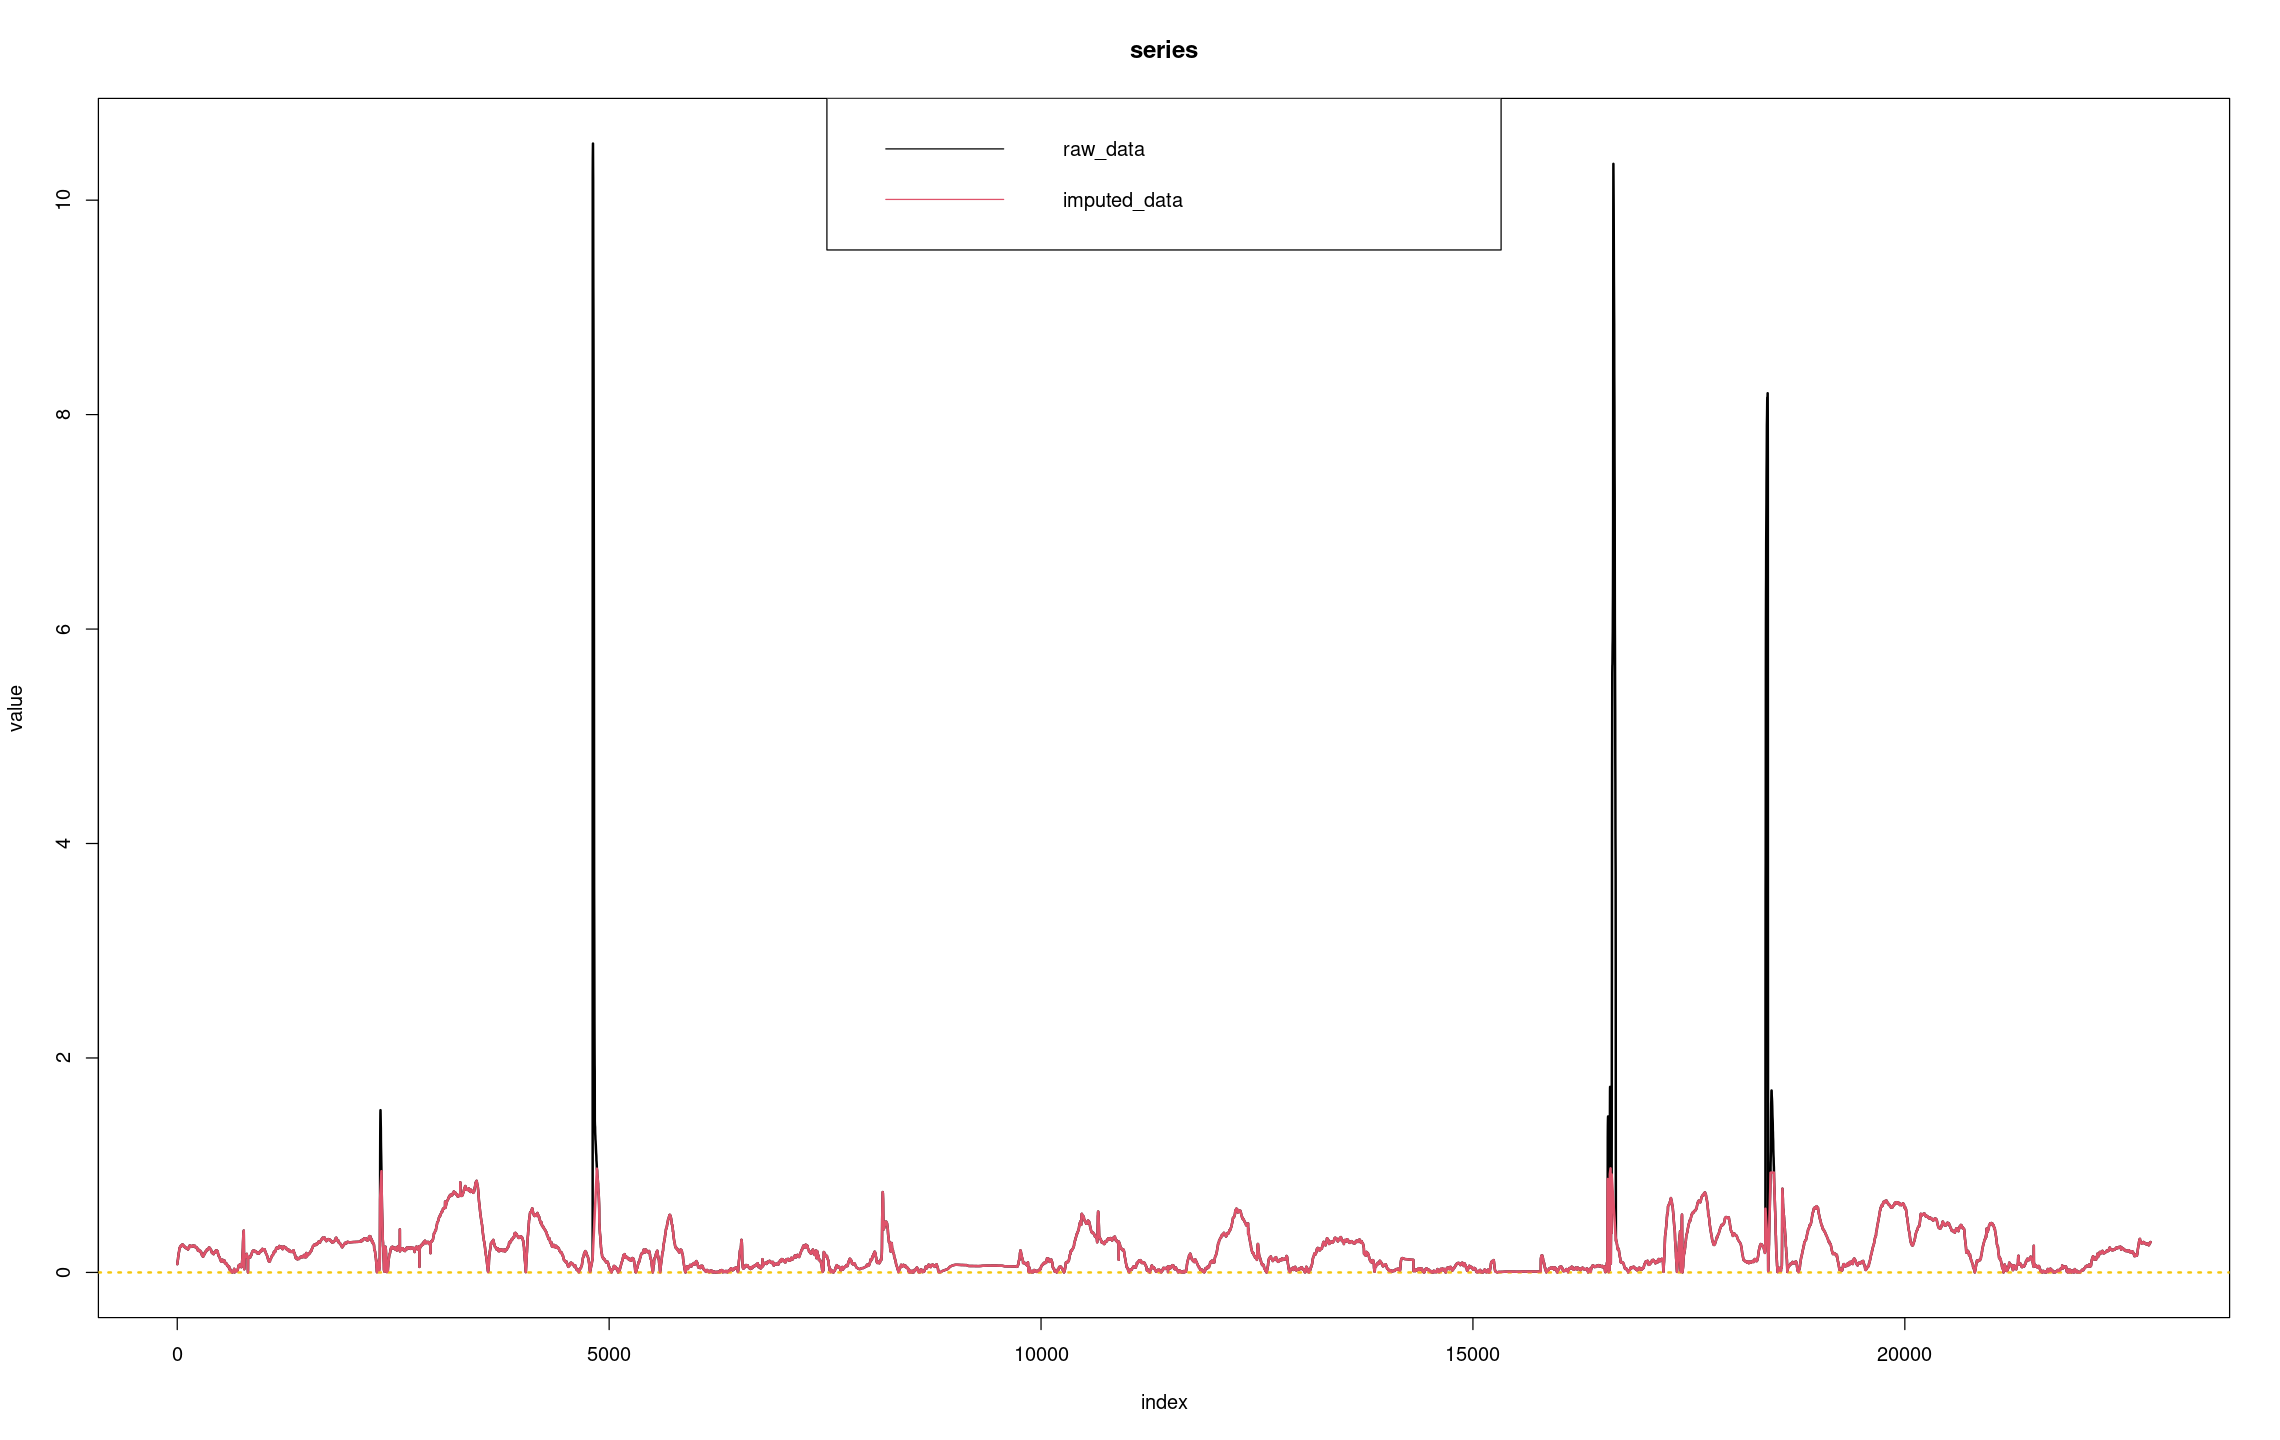

In [52]:
plot(data_longitudinal_error_abs_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "value", 
     xlab = "index",
     main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data_longitudinal_error_abs_object$imputed_data, col = 2, lwd = 2)
legend("top", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)
